# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [76]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [77]:

datasetFileName = "gokedataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(5,)
(5,)
(5,)


In [78]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
int32
<U1
(5,)
(5,)
(5,)


In [79]:
dataLabels[0]

0

In [80]:
dataLabelNames

array(['A', 'B', 'A', 'C', 'C'], dtype='<U1')

In [81]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['A', 'B', 'C']

In [82]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [83]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.30, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(3, 200, 200, 3)
(2, 200, 200, 3)


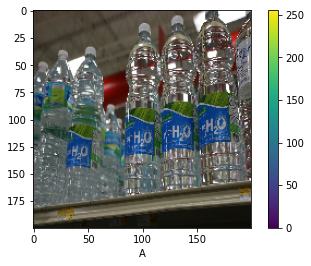

In [84]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [85]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 3)

In [86]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


IndexError: index 3 is out of bounds for axis 0 with size 3

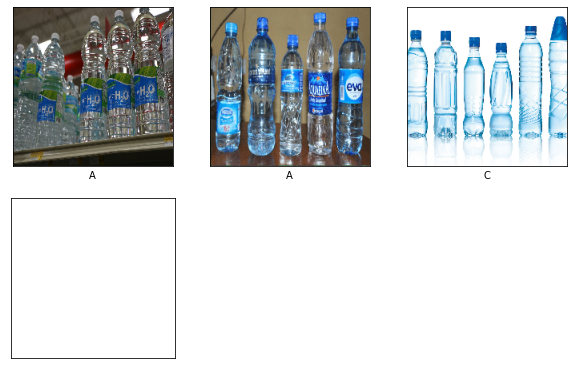

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [87]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 120000)            0         
                                                                 
 dense_16 (Dense)            (None, 128)               15360128  
                                                                 
 dense_17 (Dense)            (None, 3)                 387       
                                                                 
Total params: 15,360,515
Trainable params: 15,360,515
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [89]:
testImages.dtype

dtype('float64')

In [90]:
model.fit(trainImages, trainLabels, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.4063 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 159ms/step - loss: 25.5639 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 145ms/step - loss: 30.5369 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 133ms/step - loss: 3.0958 - accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 0s 107ms/step - loss: 20.0567 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 213ms/step - loss: 24.3459 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 133ms/step - loss: 1.8664 - accuracy: 0.6667
Epoch 8/10
1/1 [==============================] - 0s 149ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 111ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 125ms/step - loss: 7.6947 - accuracy: 0.6667


In [91]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 1s - loss: 320.1529 - accuracy: 0.0000e+00 - 553ms/epoch - 553ms/step

Test accuracy: 0.0


IndexError: index 2 is out of bounds for axis 0 with size 2

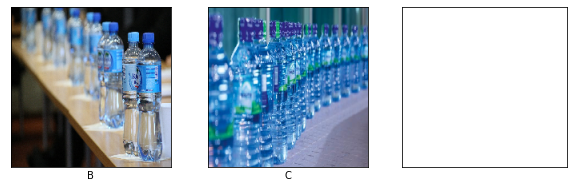

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [94]:
predictions = model.predict(testImages)
predictions[0]

array([ 323.86823, -279.0723 ,  267.80536], dtype=float32)